# Problem 4 - Page View Time Series Visualizer

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#### Import data
Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column. Make sure to parse dates.

In [83]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=[0], index_col='date')

df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


#### Clean data
Filter out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [84]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


#### Create a Line Plot
Use Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

<Axes: title={'center': 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

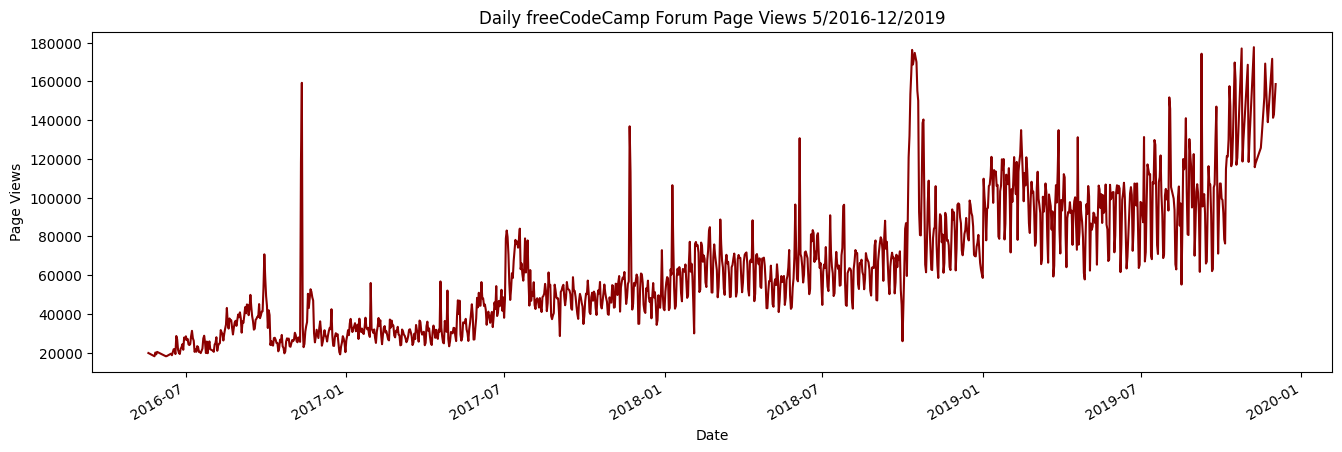

In [85]:
df.plot(kind='line', figsize=(16,5), color='darkred', legend=None, xlabel='Date', ylabel='Page Views', title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

#### Copy and modify data for monthly Bar Plot
Create a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

Create new column months. Use df_bar.index as the 'date' column is the index rather than df_bar.date.dt.strftime

In [86]:
df_bar = df.copy()

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df_bar['Months'] = pd.Categorical(df_bar.index.strftime('%B'), categories=months, ordered=True)

df_bar

,value,Months
date,,
2016-05-19,19736,May
2016-05-26,18060,May
2016-05-27,19997,May
2016-05-28,19044,May
2016-05-29,20325,May
...,...,...
2019-11-24,138875,November
2019-11-29,171584,November
2019-11-30,141161,November


Pivot the dataframe to create a new index from year, and make the columns months with the mean values from the original dataframe

In [87]:
df_bar = pd.pivot_table(data=df_bar, index=df_bar.index.year, columns='Months', values='value')

df_bar

Months,January,February,March,April,May,June,July,August,September,October,November,December
date,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


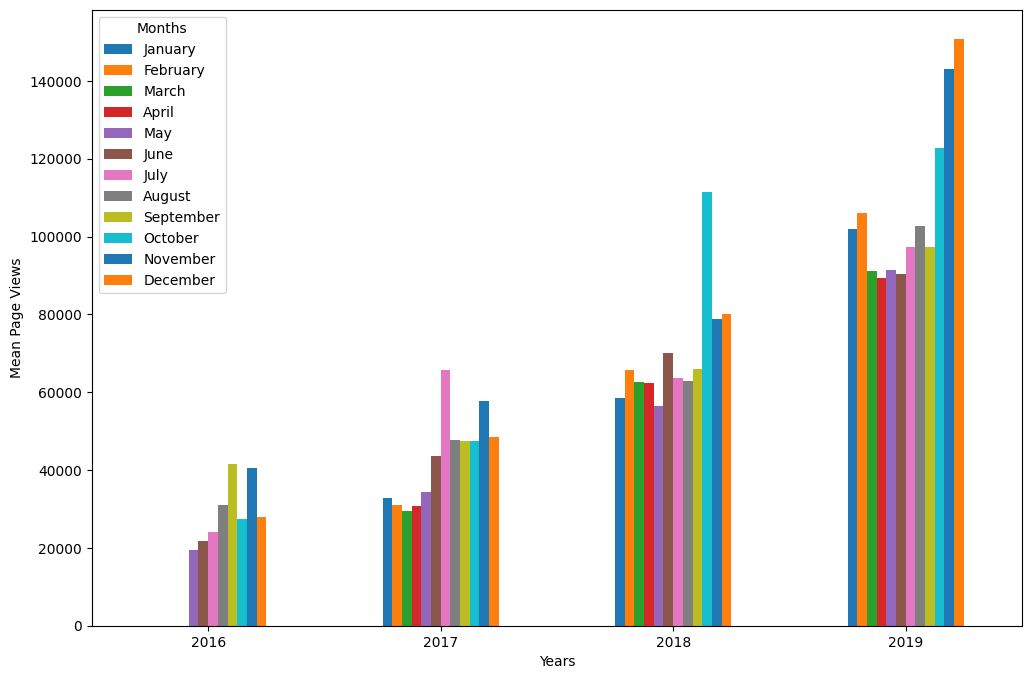

In [88]:
df_bar.plot(kind='bar', figsize=(12, 8), ylabel='Average Page Views', xlabel='Years', rot=0)

plt.legend(loc = "upper left", title='Months')


##### Prepare data for box plots

In [89]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_box['month'] = pd.Categorical(df_box['month'], categories=months, ordered=True)

df_box


,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


#### Draw box plots (using Seaborn)
Create a Box plot that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. 

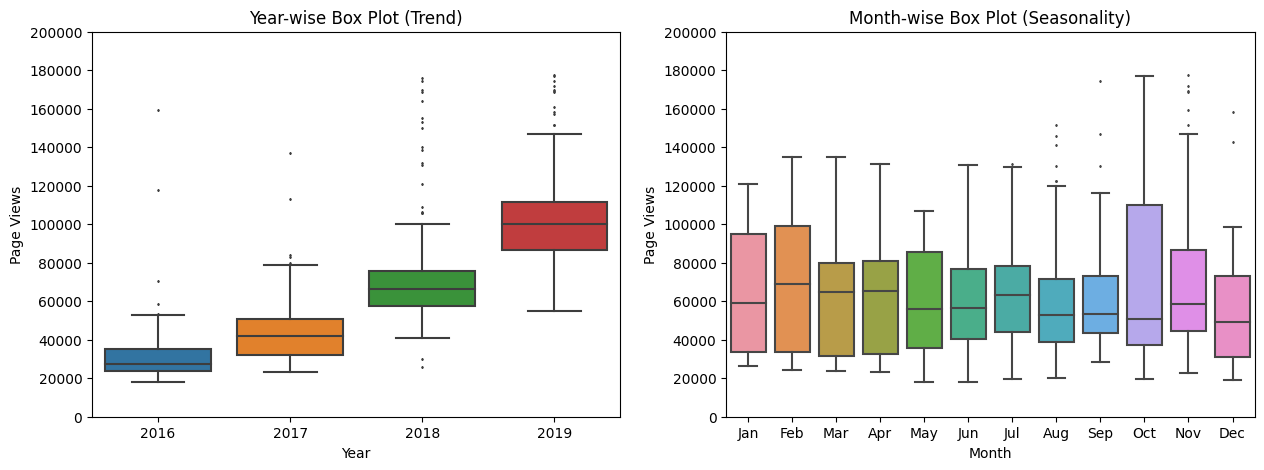

In [90]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.boxplot(ax=ax1, x = 'year', y='value', data=df_box, fliersize=1)

ax1.set_title('Year-wise Box Plot (Trend)')
ax1.set_ylabel('Page Views')
ax1.set_xlabel('Year')
ax1.set_yticks([0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000])

sns.boxplot(ax=ax2, x = 'month', y='value', data=df_box, fliersize=1)

ax2.set_title('Month-wise Box Plot (Seasonality)')
ax2.set_ylabel('Page Views')
ax2.set_xlabel('Month')
ax2.set_yticks([0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000])